<a href="https://colab.research.google.com/github/Eclyps/Tp-git/blob/main/TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP Machine learning**

**Léa FORET 2B**

**Partie 1 : Analyse Exploratoire des Données (EDA)**

1.1 Vue d'ensemble des données :

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Quelles sont les différentes colonnes du jeu de données ?


In [4]:
print(df.columns.values)
#len(df.columns.values)

['ID' 'gender' 'age' 'height(cm)' 'weight(kg)' 'waist(cm)'
 'eyesight(left)' 'eyesight(right)' 'hearing(left)' 'hearing(right)'
 'systolic' 'relaxation' 'fasting blood sugar' 'Cholesterol'
 'triglyceride' 'HDL' 'LDL' 'hemoglobin' 'Urine protein'
 'serum creatinine' 'AST' 'ALT' 'Gtp' 'oral' 'dental caries' 'tartar'
 'smoking']


Combien y a-t-il d'entrées dans le jeu de données ?

In [5]:
df.shape[0]

55702

Le jeu de données contient-il des valeures nulles ? Si oui combien ?

In [6]:
print(df.isnull().sum())

ID                     0
gender                 0
age                    6
height(cm)             0
weight(kg)             6
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64


1.2 Statistiques descriptives :

Quelle est la moyenne d'âge, de taille et de poids des fumeurs ?

In [7]:
print("moyenne d'age")
df.groupby('smoking')['age'].mean()[1]


moyenne d'age


43.560813453265546

In [8]:
print("moyenne taille")
df.groupby('smoking')['height(cm)'].mean()[1]

moyenne taille


169.4354010852031

In [9]:
print("moyenne poids")
df.groupby('smoking')['weight(kg)'].mean()[1]

moyenne poids


70.95937622213532

Y a-t-il des motifs ou des valeurs aberrantes notables dans les données ? (Un age 200 ans par exemple)

In [10]:
import seaborn as sns

<Axes: ylabel='age'>

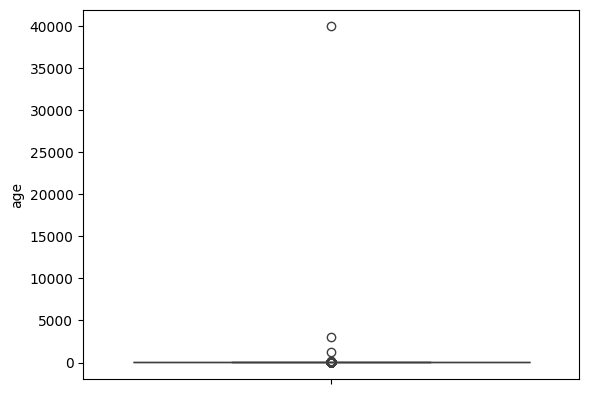

In [11]:
sns.boxplot(df['age'])

Oui il y en a

Quelle est l'écart type de l'hémoglobine ?

In [12]:
print("ecart type hémoglobine")
df['hemoglobin'].std()

ecart type hémoglobine


1.5644757507736968

1.3 Distribution de la donnée :

Combien y a-il de fumeur vs non-fumeur ? Le résultat doit être présenté sous forme de "pie chart"

In [13]:
nonFumeur=df['smoking'].value_counts()[0]

In [14]:
fumeur=df['smoking'].value_counts()[1]

In [15]:
import matplotlib.pyplot as plt

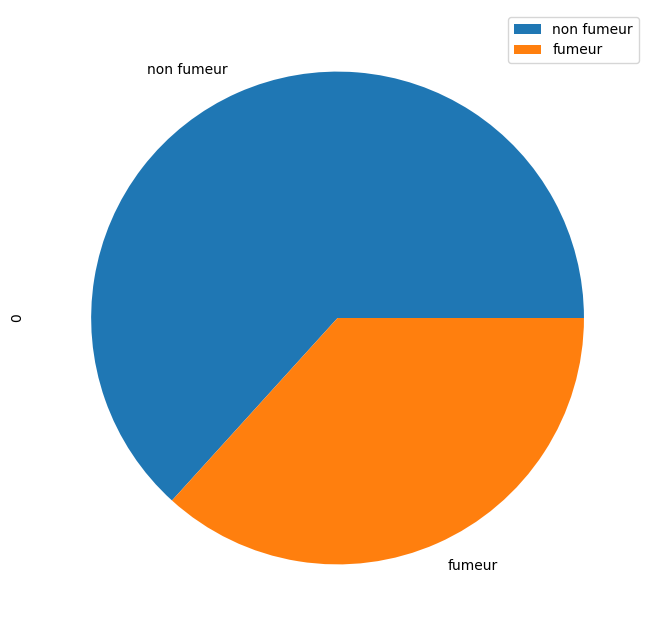

In [16]:
df=pd.DataFrame([nonFumeur,fumeur], index=['non fumeur','fumeur'])
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.show()

Combien d'hommes? sont fumeurs ? Combien de femmes ? Afficher un histogramme

<function matplotlib.pyplot.show(close=None, block=None)>

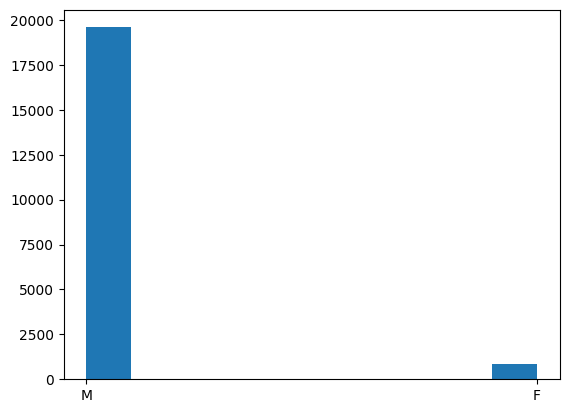

In [17]:
df = pd.read_csv("dataset.csv")
fumeur = df.groupby('smoking')['gender'].sum()[1]
fumeur = list(fumeur)

histogramme=plt.hist(fumeur)
plt.show

In [18]:
df.groupby(['smoking','gender'])['age'].mean()[1][1]

43.437005664132265

1.4 Analyse de corrélation :

Quel problème rencontrez-vous ?

In [19]:
correlation=df.corr()
sns.heatmap(correlation, annot=True)

ValueError: could not convert string to float: 'F'

Les var sont des string alors qu'on veut du numérique.

Passez à la partie 2 et revenez aux questions suivante plus tard.

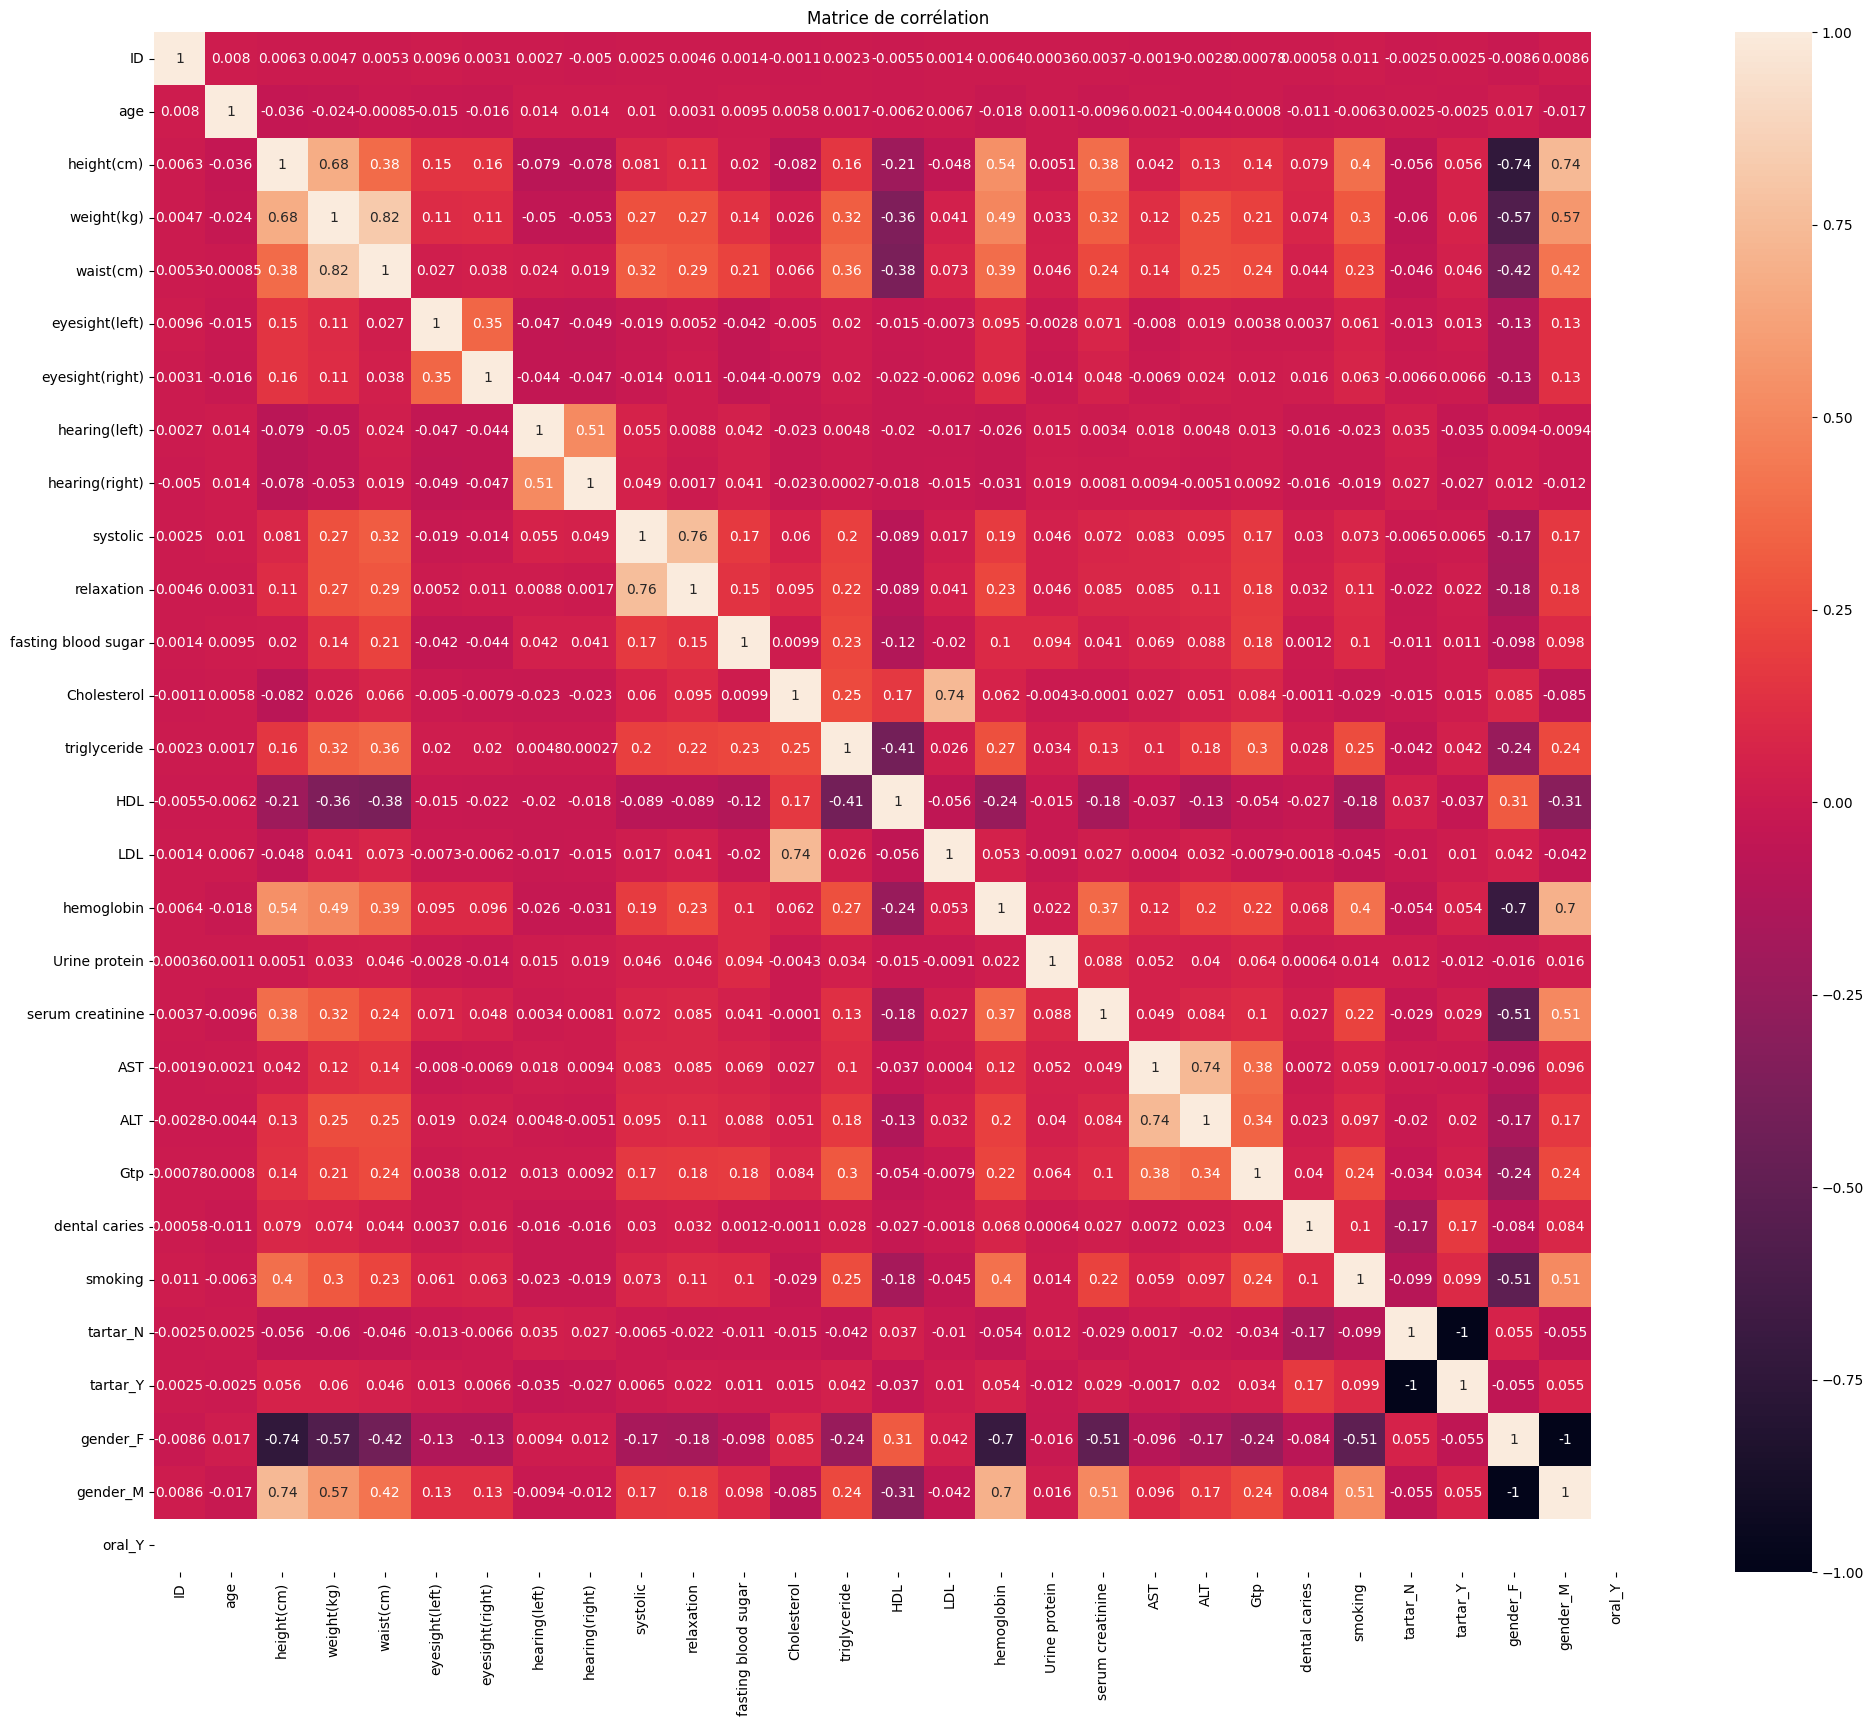

In [34]:
correlation=df_OHE.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(correlation,annot=True)
plt.title('Matrice de corrélation')
plt.show()

Quelles variables sont les plus fortement corrélées entre elles ?

Les variables les plus corrélé entre elles sont gender_F avec gender_M, tartar_N avec tartar_Y ce qui est normal puisque si l'un est vrai l'autre est faux. Les trois autres plus corrélées sont weight avec waist, relaxation avec systolic et gender_F avec height.


Comment la variable cible (fumeur) est-elle corrélée avec les autres variables ? Donnez le top 3

Le top 3 les plus corrélés avec smoking sont gender_M, l'hemoglobine et la triglyceride.


**Partie 2 : Data pre-processing**

2.1 Gestion des Valeurs Manquantes :

Décider d'une stratégie pour gérer les valeurs manquantes (par exemple, suppression, estimation). Implémenter la stratégie choisie.

Quelle méthode avez-vous choisie pour gérer les valeurs manquantes et pourquoi ?

J'ai supprimer les lignes pour lesquelles il y avait des valeurs manquantes, le jeu de donner n'ai pas vraiment modifier car elle ne sont pas nombreuses.

In [20]:
df2=df.dropna()
df2.shape[0]

55696

2.2 Encodage des catégories

Encodez les variables en utilisant un OneHotEncorer


In [21]:
from sklearn.preprocessing import OneHotEncoder
df_OHE = pd.get_dummies(df2, columns = ['tartar','gender', 'oral'])
print(df_OHE)

          ID      age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0     40.0         155        60.0       81.3             1.2   
1          1     40.0         160        60.0       81.0             0.8   
2          2     55.0         170        60.0       80.0             0.8   
3          3     40.0         165        70.0       88.0             1.5   
4          4     40.0         155        60.0       86.0             1.0   
...      ...      ...         ...         ...        ...             ...   
55691  55691     55.0         160        65.0       85.0             0.9   
55692  55681    180.0         160        50.0       70.0             1.2   
55693  55683   1200.0         160        50.0       68.5             1.0   
55694  55684   3000.0         165        60.0       78.0             0.8   
55695  55691  40000.0         160        65.0       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...   AST  \
0        

Quel autre traitement de la donnée pourriez-vous faire pour optimiser l'entraînement ?

On pourrait utilier le Feature Scailing et le Batch Normalization

**Partie 3 :**

3.1 Création de jeu de test et d'entraînement

Séparez la data en 2 parties : train & test.

In [23]:
from sklearn.model_selection import train_test_split
X = df_OHE.drop('smoking',axis=1)
y = df_OHE['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Quelle proportion des données avez-vous utilisée pour l'entraînement et pour le test ?

J'ai pris 80% d'entraînement et 20% de test.

Pourquoi est-il important de diviser les données ?

Pour pouvoir évaluer notre modèle avec notre données de test.

3.2 Entraînement d'un modèle simple :
LogisticRegression

Entraîner un modèle de régression logistique simple sur les données d'entraînement.

In [24]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Il faut scale les valeurs pour ne plus avoir le warning.

Quels sont les résultats de ce modèle sur le jeu de test ?

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_test,y_pred)

0.6934470377019749

<Axes: >

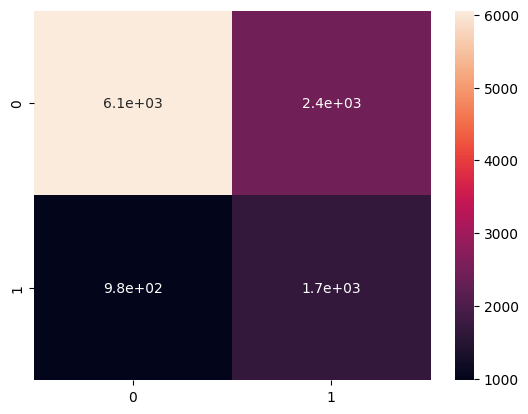

In [26]:
conf_mat_result = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_mat_result, annot=True)

3.3 Entraîner et ajuster les paramètres de plusieurs modèles

Entraîner au moins quatre modèles différents et ajuster leurs hyperparamètres en utilisant GridSearchCV.

In [29]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

**KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(2, 7))
param_grid = dict(n_neighbors=k_range)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("Accuracy:",accuracy_knn,"\n Recall:",recall_knn,"\nF1:",f1_knn)

Accuracy: 0.6611310592459605 
 Recall: 0.2934015096177258 
F1: 0.3896523848019402


**Arbre de décision**

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [40, 50, 60, 70],
    'min_samples_split': [2, 10, 20]
             }

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_decision_tree = grid_search.best_estimator_
y_pred_tree = best_decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
print("Accuracy:",accuracy_tree,"\n Recall:",recall_tree,"\nF1:",f1_tree)

Accuracy: 0.7716337522441652 
 Recall: 0.6956415875334794 
F1: 0.6919350932429159


**Random forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10]
}
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_random_forest = grid_search.best_estimator_
y_pred_random_forest = best_random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("Accuracy:",accuracy_random_forest,"\n Recall:",recall_random_forest,"\nF1:",f1_random_forest)

Accuracy: 0.8195691202872532 
 Recall: 0.7959581202824446 
F1: 0.7648572765559195


**xgboost**

In [80]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 6]
}
grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_xgboost = grid_search.best_estimator_
y_pred_xgboost = best_xgboost.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)
print("Accuracy:",accuracy_xgboost,"\n Recall:",recall_xgboost,"\nF1:",f1_xgboost)

Accuracy: 0.7747755834829444 
 Recall: 0.7197467738008279 
F1: 0.7020543878399239


Quels hyperparamètres avez-vous ajustés pour chaque modèle ?

**KNN:**
- le nombre de voisin

**Arbre de décision:**
- fonction pour voir si le split est équilibré
- la profondeur de l'arbre
- nb d'échantillon pour avoir un noeud

**Random forest:**
- le nombre d'arbres
- la profondeur des arbres
- nb d'échantillon pour avoir un noeud

**Xgboost:**
- le nombre d'arbres
- l'apprentissage
- nb d'échantillon pour avoir un noeud

Quel est l'impact de l'ajustement des hyperparamètres sur les performances des modèles ?

Cela permet d'avoir un modéle avec une meilleure précision et donc un meilleur modèle.

3.4 Évaluer les Performances des Modèles

Évaluer chaque modèle en utilisant des métriques telles que l'accuracy, le recall, le F1-score, afficher le nombre de faux-positifs...

Quelle est la performance de chaque modèle sur l'ensemble de test ?
**Voir précédemment**

Quel modèle a les meilleures performances globales et pourquoi ?

Le modèle ayant les meilleurs performance est le random forest car sur les trois métriques utilisés, le random forest à le plus haut pourcentage indiquant un modèle précis, sensible et est équilibré.